In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [57]:
results_df = pd.read_csv("grid_search_yolov8/grid_search_results.csv")
results_df.sort_values(by="mAP50", ascending=False)

,lr0,momentum,weight_decay,batch,run_name,mAP50
0,0.010,0.900,0.0001,32,grid_trial_3,0.92084
1,0.010,0.937,0.0001,32,grid_trial_7,0.92084
2,0.001,0.900,0.0001,32,grid_trial_11,0.92084
3,0.001,0.937,0.0001,32,grid_trial_15,0.92084
4,0.010,0.900,0.0005,32,grid_trial_1,0.92001
5,0.010,0.937,0.0005,32,grid_trial_5,0.92001
6,0.001,0.900,0.0005,32,grid_trial_9,0.92001
7,0.001,0.937,0.0005,32,grid_trial_13,0.92001
8,0.010,0.900,0.0005,16,grid_trial_0,0.91982
9,0.010,0.937,0.0005,16,grid_trial_4,0.91982


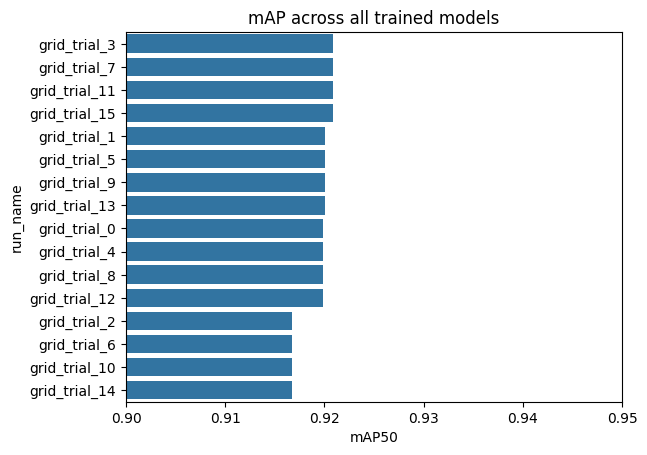

In [58]:
fig, ax = plt.subplots()
sns.barplot(x="mAP50", y="run_name", ax=ax, data=results_df.sort_values(by="mAP50", ascending=False))
ax.set_xlim(0.9, 0.95)
plt.title("mAP across all trained models")
plt.savefig(f'../images/all_models_map50.png')
plt.show()

In [59]:
df = pd.read_csv("grid_search_yolov8/grid_trial_3/results.csv")
df


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,145.367,1.51449,3.06263,1.48718,0.95129,0.15792,0.50561,0.34669,1.38197,2.72279,1.40064,0.000329,0.000329,0.000329
1,2,285.315,1.35371,1.44334,1.32438,0.84895,0.55951,0.73226,0.42312,1.50458,2.11943,1.27849,0.000638,0.000638,0.000638
2,3,425.845,1.27434,1.16338,1.27144,0.83165,0.74301,0.86486,0.50926,1.36803,1.88483,1.22406,0.000914,0.000914,0.000914
3,4,565.223,1.23124,1.05218,1.24269,0.82304,0.86321,0.87629,0.56091,1.15084,1.14989,1.13607,0.001156,0.001156,0.001156
4,5,703.885,1.20525,1.01592,1.23940,0.81168,0.54288,0.77477,0.44511,1.57573,2.41250,1.45080,0.001146,0.001146,0.001146
5,6,843.442,1.18221,0.97146,1.21750,0.83284,0.90203,0.88853,0.56185,1.22433,1.24372,1.21507,0.001075,0.001075,0.001075
6,7,983.084,1.16251,0.94336,1.20767,0.82080,0.91441,0.88157,0.57852,1.15615,1.07665,1.11167,0.001005,0.001005,0.001005
7,8,1122.320,1.16769,0.93252,1.21022,0.77190,0.93615,0.87442,0.58532,1.11209,0.91214,1.13645,0.000934,0.000934,0.000934
8,9,1261.960,1.15641,0.91755,1.19744,0.79429,0.95017,0.90098,0.59547,1.13189,0.88237,1.18729,0.000863,0.000863,0.000863
9,10,1400.500,1.14059,0.91407,1.19034,0.76863,0.90410,0.89671,0.57188,1.40876,0.95674,1.27184,0.000792,0.000792,0.000792


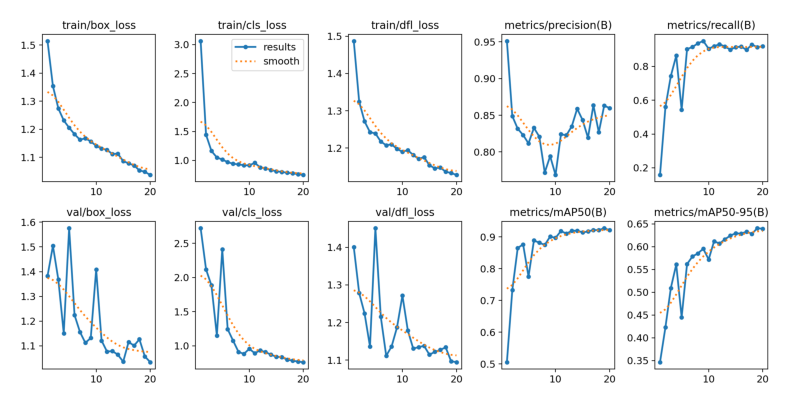

In [60]:
image = cv2.imread("grid_search_yolov8/grid_trial_3/results.png")
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(f'../images/best_model_results.png')
plt.show()

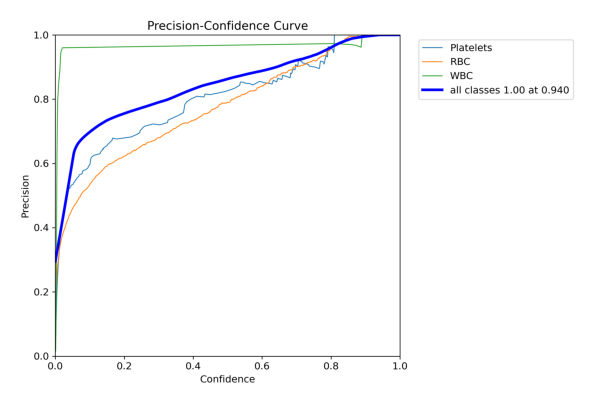

In [61]:
image = cv2.imread("grid_search_yolov8/grid_trial_3/P_curve.png")
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(f'../images/best_model_P_curve.png')
plt.show()

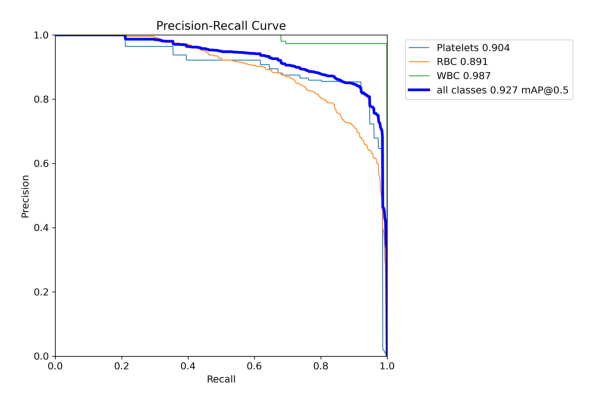

In [62]:
image = cv2.imread("grid_search_yolov8/grid_trial_3/PR_curve.png")
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(f'../images/best_model_PR_curve.png')
plt.show()

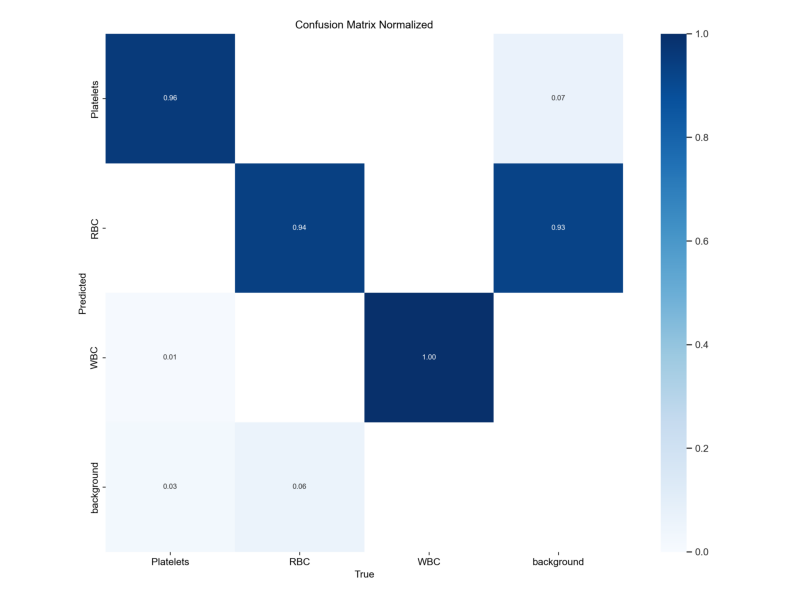

In [63]:
image = cv2.imread("grid_search_yolov8/grid_trial_3/confusion_matrix_normalized.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(f'../images/best_model_confusion_matrix_normalized.png')
plt.show()

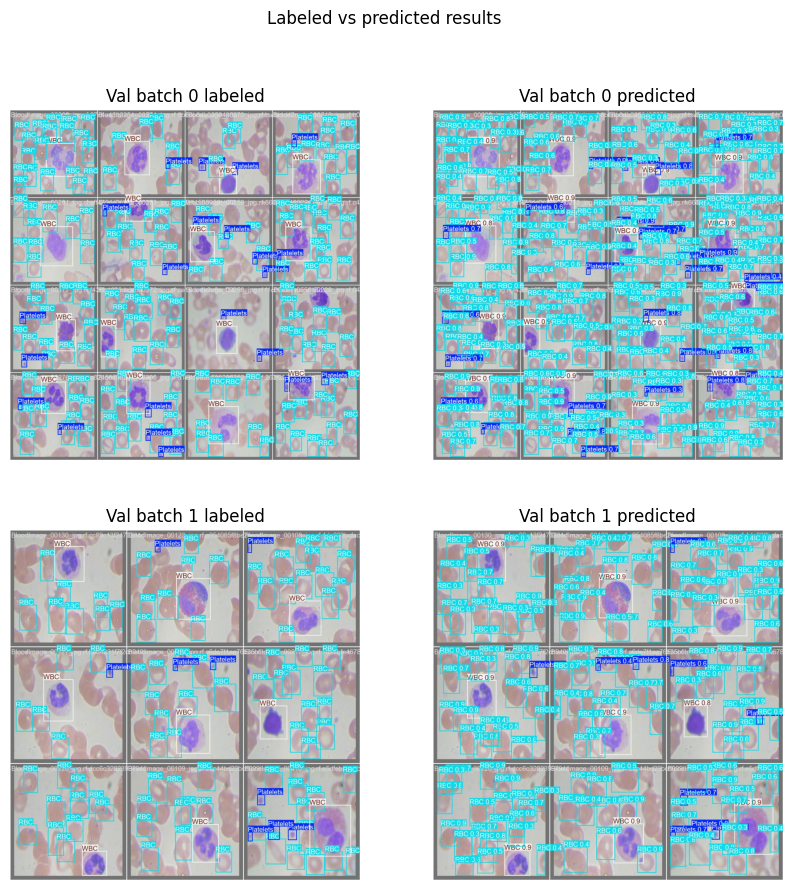

In [ ]:
val_label_0 = cv2.imread("grid_search_yolov8/grid_trial_3/val_batch0_labels.jpg")
val_pred_0 = cv2.imread("grid_search_yolov8/grid_trial_3/val_batch0_pred.jpg")
val_label_1 = cv2.imread("grid_search_yolov8/grid_trial_3/val_batch1_labels.jpg")
val_pred_1 = cv2.imread("grid_search_yolov8/grid_trial_3/val_batch1_pred.jpg")

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(val_label_0, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Val batch 0 labeled")
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(val_pred_0, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Val batch 0 predicted")
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(val_label_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Val batch 1 labeled")
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(val_pred_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Val batch 1 predicted")
plt.suptitle("Labeled vs predicted results")
plt.savefig(f'../images/best_model_labeled_vs_predicted.png')
plt.show()
